### Import Librairies

In [406]:
#data manipulation
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sb

#data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

#data selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

#data modeling
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

#data performance
from sklearn.metrics import  r2_score
from sklearn.metrics import mean_squared_error



from tqdm import tqdm

### Read dataset

In [407]:
demand = pd.read_csv('Historical Product Demand.csv')
demand.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [408]:
demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1048575 non-null  object
 1   Warehouse         1048575 non-null  object
 2   Product_Category  1048575 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1048575 non-null  object
dtypes: object(5)
memory usage: 40.0+ MB


### Check Null values

In [409]:
demand.isna().sum()

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64

### Check unique values

In [410]:
for col in demand.columns:
    print(demand[col].unique())

['Product_0993' 'Product_0979' 'Product_1159' ... 'Product_0237'
 'Product_0644' 'Product_0853']
['Whse_J' 'Whse_S' 'Whse_C' 'Whse_A']
['Category_028' 'Category_006' 'Category_001' 'Category_019'
 'Category_005' 'Category_030' 'Category_032' 'Category_011'
 'Category_033' 'Category_007' 'Category_015' 'Category_021'
 'Category_024' 'Category_026' 'Category_023' 'Category_022'
 'Category_009' 'Category_003' 'Category_004' 'Category_018'
 'Category_020' 'Category_013' 'Category_008' 'Category_017'
 'Category_031' 'Category_025' 'Category_010' 'Category_029'
 'Category_012' 'Category_002' 'Category_014' 'Category_027'
 'Category_016']
['2012/7/27' '2012/1/19' '2012/2/3' ... '2016/4/17' '2016/3/27'
 '2016/2/21']
['100 ' '500 ' '50000 ' ... '(3750)' '(191)' '28250 ']


### Correct inconsistent values

In [411]:
#convert "Date" from categorical to "datetime" data type
demand['Date'] = pd.to_datetime(demand['Date'])

#remove inconsistency form of variable contents
demand['Order_Demand']  = demand['Order_Demand'].apply(lambda x: x[1:-1] if x[0] == '(' and x[-1] == ')' else x)

#convert "Order_Demand" from categorical to int "data" type
demand['Order_Demand'] = demand['Order_Demand'].astype(float)

demand = demand.sort_values(by = 'Date', ascending= True)

#drop Null values
demand = demand.dropna()

#convert categorical types
demand = pd.get_dummies(demand.drop(['Product_Code'], axis=1)).astype(int)

#convert "Date" from categorical to "datetime" data type
demand['Date'] = pd.to_datetime(demand['Date'])

demand.head()

,Date,Order_Demand,Warehouse_Whse_A,Warehouse_Whse_C,Warehouse_Whse_J,Warehouse_Whse_S,Product_Category_Category_001,Product_Category_Category_002,Product_Category_Category_003,Product_Category_Category_004,...,Product_Category_Category_024,Product_Category_Category_025,Product_Category_Category_026,Product_Category_Category_027,Product_Category_Category_028,Product_Category_Category_029,Product_Category_Category_030,Product_Category_Category_031,Product_Category_Category_032,Product_Category_Category_033
44799,2011-01-08,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72252,2011-05-31,108,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8431,2011-06-24,85000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8432,2011-06-24,7000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72669,2011-09-02,1250,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Check for missing values

In [412]:
demand.isna().sum()


Date                             0
Order_Demand                     0
Warehouse_Whse_A                 0
Warehouse_Whse_C                 0
Warehouse_Whse_J                 0
Warehouse_Whse_S                 0
Product_Category_Category_001    0
Product_Category_Category_002    0
Product_Category_Category_003    0
Product_Category_Category_004    0
Product_Category_Category_005    0
Product_Category_Category_006    0
Product_Category_Category_007    0
Product_Category_Category_008    0
Product_Category_Category_009    0
Product_Category_Category_010    0
Product_Category_Category_011    0
Product_Category_Category_012    0
Product_Category_Category_013    0
Product_Category_Category_014    0
Product_Category_Category_015    0
Product_Category_Category_016    0
Product_Category_Category_017    0
Product_Category_Category_018    0
Product_Category_Category_019    0
Product_Category_Category_020    0
Product_Category_Category_021    0
Product_Category_Category_022    0
Product_Category_Cat

#### Set Date as index

In [413]:
demand.set_index('Date', inplace=True)
demand.head()

,Order_Demand,Warehouse_Whse_A,Warehouse_Whse_C,Warehouse_Whse_J,Warehouse_Whse_S,Product_Category_Category_001,Product_Category_Category_002,Product_Category_Category_003,Product_Category_Category_004,Product_Category_Category_005,...,Product_Category_Category_024,Product_Category_Category_025,Product_Category_Category_026,Product_Category_Category_027,Product_Category_Category_028,Product_Category_Category_029,Product_Category_Category_030,Product_Category_Category_031,Product_Category_Category_032,Product_Category_Category_033
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-08,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-05-31,108,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-06-24,85000,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-06-24,7000,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-09-02,1250,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### plot Order demand againt the time

<Axes: title={'center': 'Order Demand'}, xlabel='Date'>

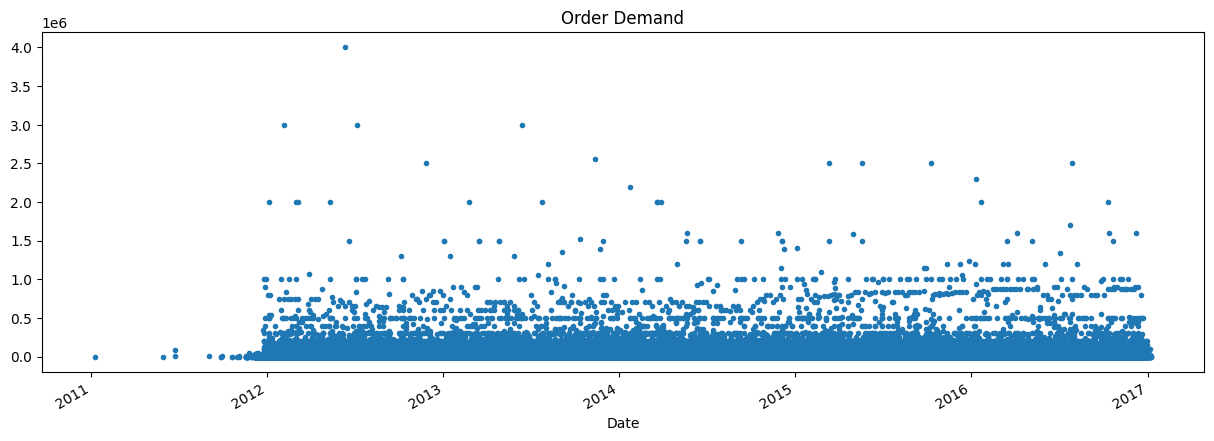

In [414]:

color_pal = sb.color_palette()
demand['Order_Demand'].plot(style='.', figsize=(15,5), color=color_pal[0], title='Order Demand')

### Select Train set and test set

In [415]:
#demand = demand[demand['Order_Demand'] <= 1.25e+06]
train = demand['Order_Demand'].loc[(demand.index > '2012-01-01') & (demand.index < '2016-01-01')]
test = demand['Order_Demand'].loc[demand.index >= '2016-01-01']

### plot Train set and test set

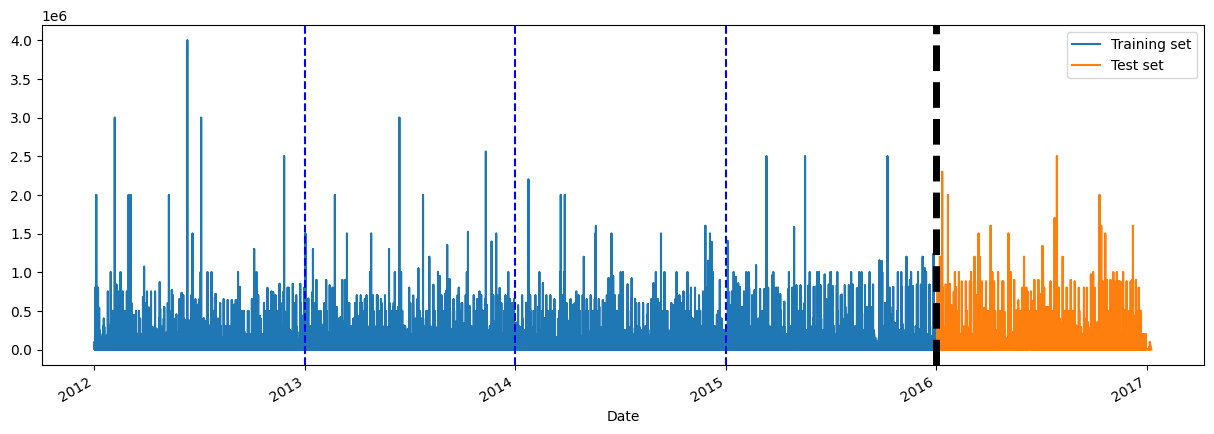

In [416]:
fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label='Training set')
test.plot(ax=ax, label='Test set')
ax.axvline('2016-01-01', color='black', ls='--', lw=5)
ax.axvline('2015-01-01', color='blue', ls='--')
ax.axvline('2014-01-01', color='blue', ls='--')
ax.axvline('2013-01-01', color='blue', ls='--')
plt.legend()
plt.show()

### Plot order demand Daily in a week '2016-01-01' to '2016-01-08'

<Axes: xlabel='Date'>

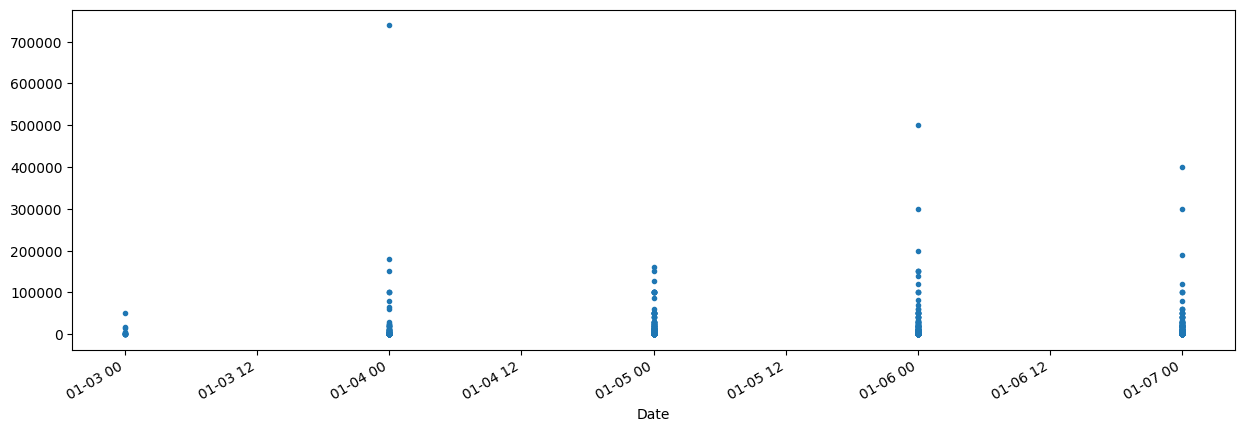

In [417]:
demand['Order_Demand'].loc[(demand.index > '2016-01-01') & (demand.index < '2016-01-08')].plot(style='.', figsize=(15,5))

### Plot order demand for 3 weeks

<Axes: xlabel='Date'>

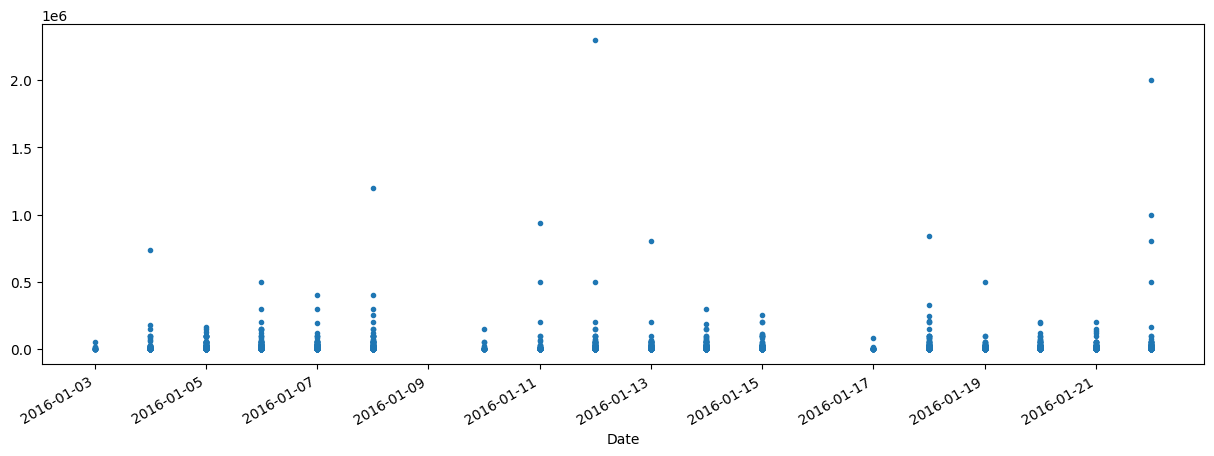

In [418]:
demand['Order_Demand'].loc[(demand.index > '2016-01-01') & (demand.index < '2016-01-23')].plot(style='.', figsize=(15,5))

### Plot order demand for one month

<Axes: xlabel='Date'>

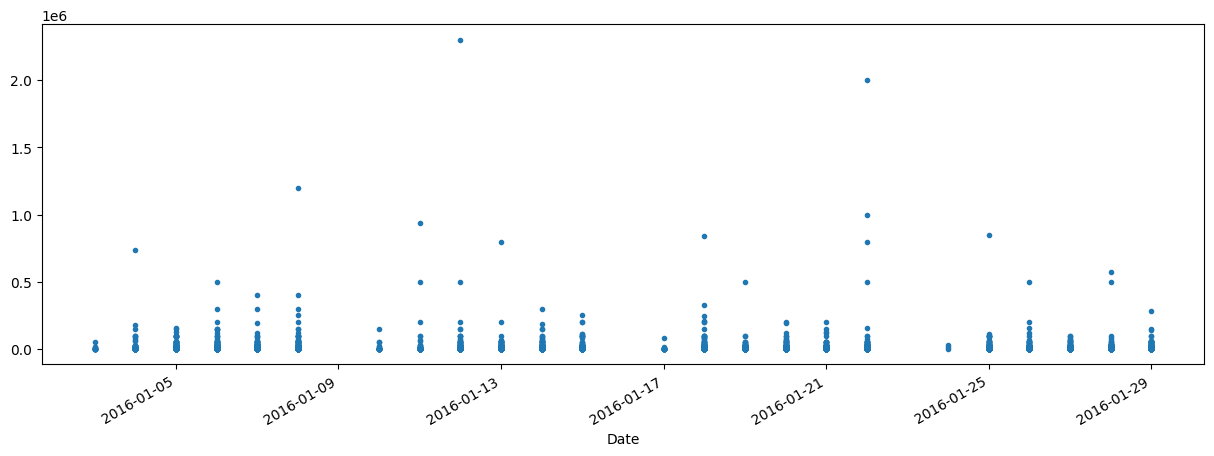

In [419]:
demand['Order_Demand'].loc[(demand.index > '2016-01-01') & (demand.index < '2016-01-31')].plot(style='.', figsize=(15,5))

### Plot order demand for a year

<Axes: xlabel='Date'>

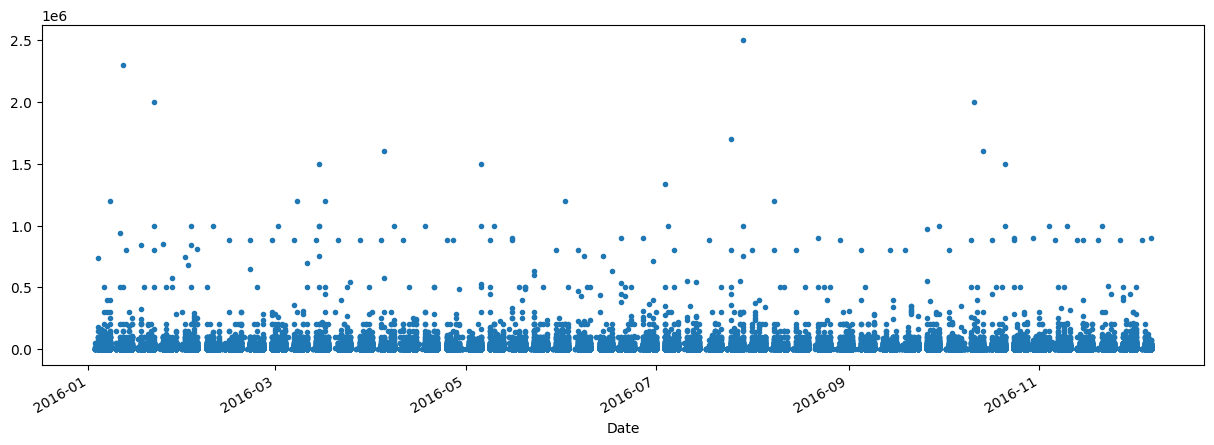

In [420]:
demand['Order_Demand'].loc[(demand.index > '2016-01-01') & (demand.index < '2016-12-08')].plot(style='.', figsize=(15,5))

### Plot order demand dailly for each Week for a month

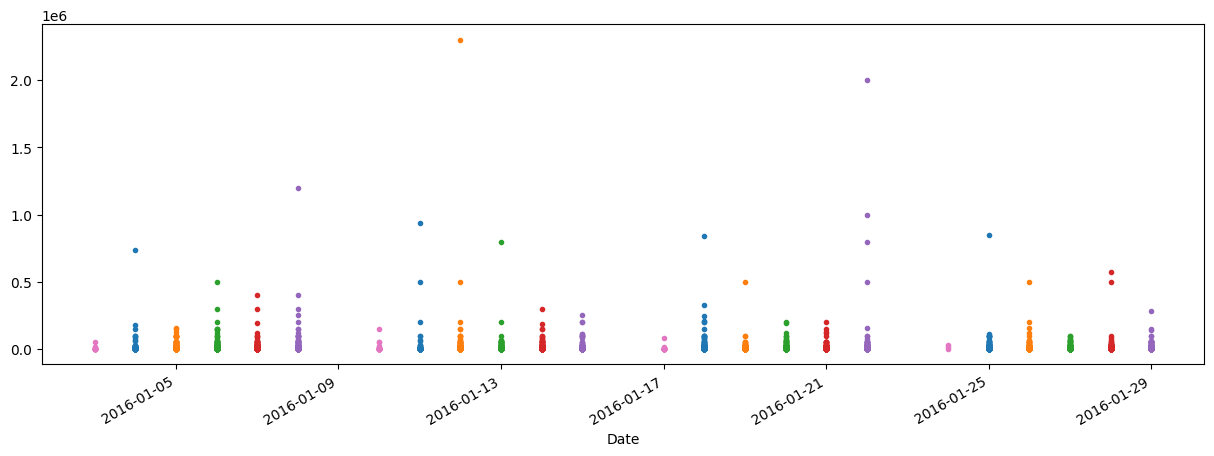

In [421]:
for i in range(0,7):
    demand['Order_Demand'].loc[(demand.index > '2016-01-01') & (demand.index < '2016-01-31') & (demand.index.weekday == i)].plot(style='.', figsize=(15,5))

### Plot order demand Every saturday in 2016

<Axes: xlabel='Date'>

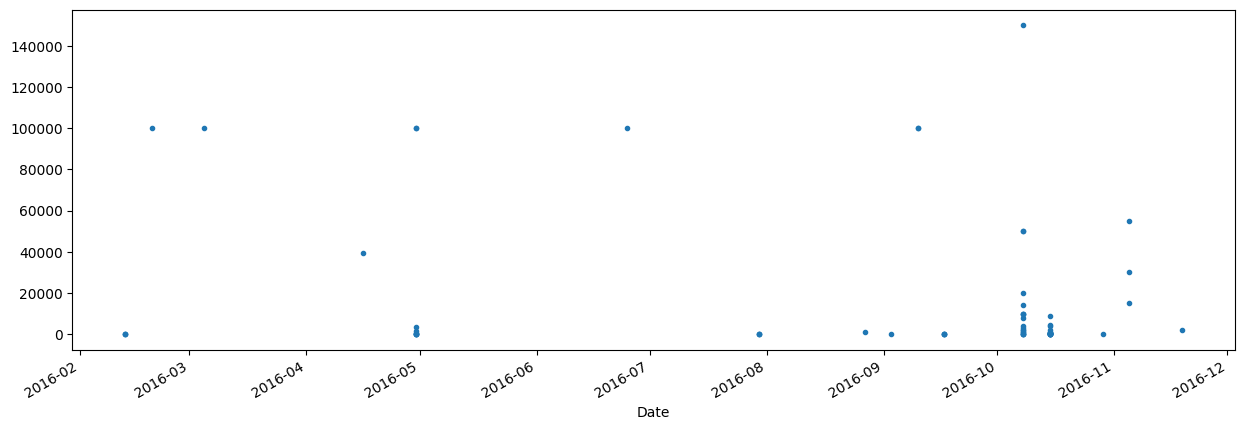

In [422]:
demand['Order_Demand'].loc[(demand.index > '2016-01-01') & (demand.index < '2016-12-31') & (demand.index.weekday == 5)].plot(style='.', figsize=(15,5))

### Plot order demand Every Sunday in 2016

<Axes: xlabel='Date'>

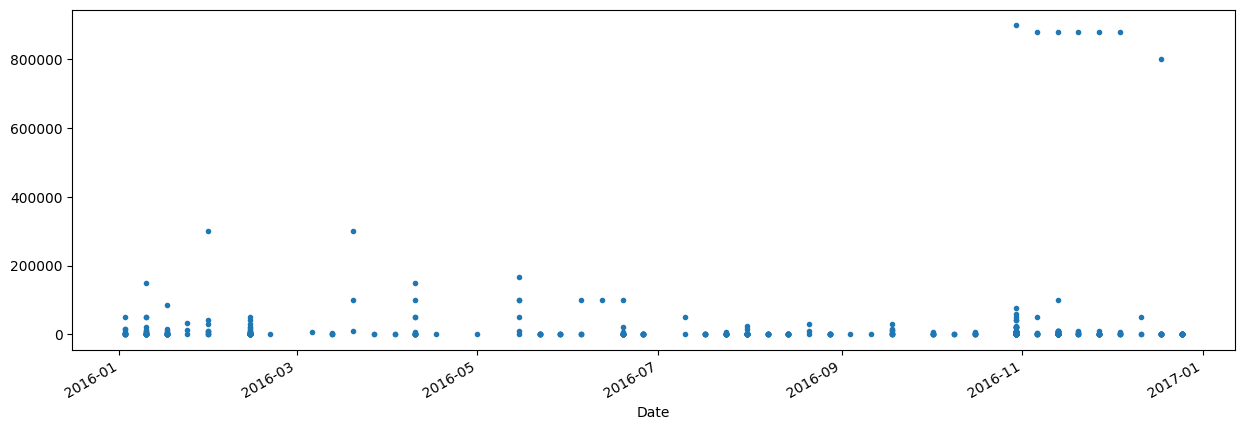

In [423]:
demand['Order_Demand'].loc[(demand.index > '2016-01-01') & (demand.index < '2016-12-31') & (demand.index.weekday == 6)].plot(style='.', figsize=(15,5))

### Plot order demand Every weekend in 2016

<Axes: xlabel='Date'>

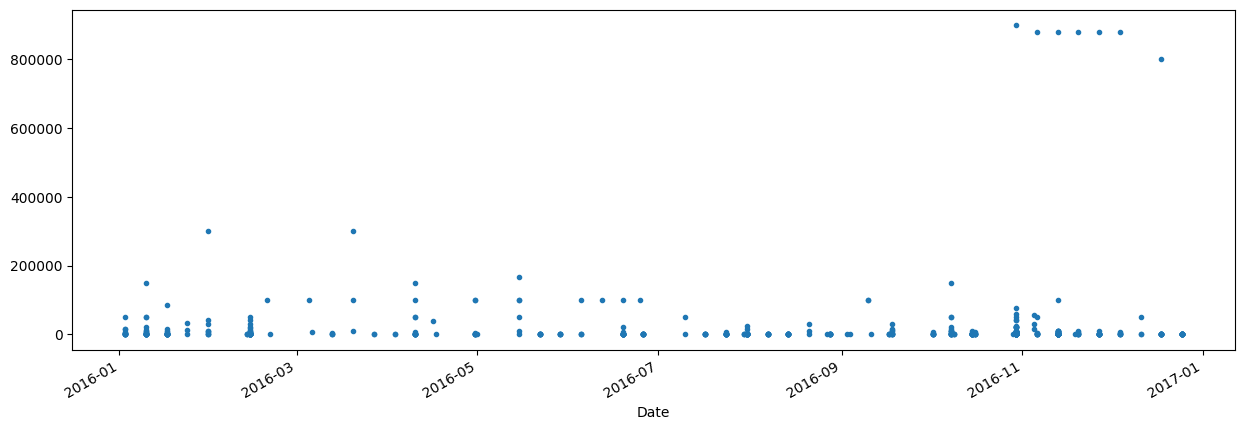

In [424]:
demand['Order_Demand'].loc[(demand.index > '2016-01-01') & (demand.index < '2016-12-31') & ((demand.index.weekday == 5)|(demand.index.weekday == 6))].plot(style='.', figsize=(15,5))

<p>We can conlude that there is weekly pattern on the demand:</p>
<ul>
<li>high demand during the weeday from Monday to Friday</li>
<li>Low demand durning the weekend, mainly  almost no demand every sunday </li>
</ul>


### Group and sum up all daily order demand 

In [425]:

demand_day = demand.groupby(demand.index).sum()

demand_day.head()

,Order_Demand,Warehouse_Whse_A,Warehouse_Whse_C,Warehouse_Whse_J,Warehouse_Whse_S,Product_Category_Category_001,Product_Category_Category_002,Product_Category_Category_003,Product_Category_Category_004,Product_Category_Category_005,...,Product_Category_Category_024,Product_Category_Category_025,Product_Category_Category_026,Product_Category_Category_027,Product_Category_Category_028,Product_Category_Category_029,Product_Category_Category_030,Product_Category_Category_031,Product_Category_Category_032,Product_Category_Category_033
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-08,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-05-31,108,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-06-24,92000,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-09-02,1250,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-09-27,28,0,2,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Create new features

In [426]:

demand_day['day_of_week'] = demand_day.index.day_of_week
demand_day['weekday'] = demand_day['day_of_week'].apply(lambda x: 0 if x <5 else 1)
demand_day['week'] = demand_day.index.isocalendar().week
demand_day['month'] = demand_day.index.month
demand_day['quarter'] = demand_day.index.quarter
demand_day['year'] = demand_day.index.year
demand_day.head()

,Order_Demand,Warehouse_Whse_A,Warehouse_Whse_C,Warehouse_Whse_J,Warehouse_Whse_S,Product_Category_Category_001,Product_Category_Category_002,Product_Category_Category_003,Product_Category_Category_004,Product_Category_Category_005,...,Product_Category_Category_030,Product_Category_Category_031,Product_Category_Category_032,Product_Category_Category_033,day_of_week,weekday,week,month,quarter,year
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-08,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,5,1,1,1,1,2011
2011-05-31,108,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,22,5,2,2011
2011-06-24,92000,0,0,0,2,0,0,0,0,0,...,0,0,0,0,4,0,25,6,2,2011
2011-09-02,1250,0,1,0,0,0,0,0,0,0,...,0,0,0,0,4,0,35,9,3,2011
2011-09-27,28,0,2,0,0,2,0,0,0,0,...,0,0,0,0,1,0,39,9,3,2011


### plot Order demand for 2 months

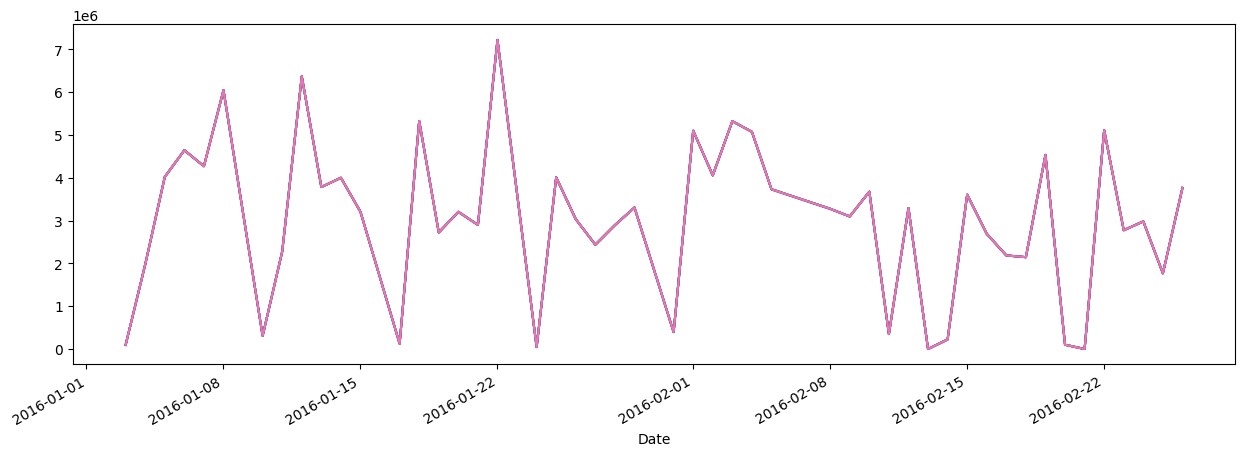

In [427]:
for i in range(0,7):
    demand_day['Order_Demand'].loc[(demand_day.index > '2016-01-01') & (demand_day.index < '2016-02-28')].plot(style='-', figsize=(15,5))

##### We can conclude that the order demand are weekly periodic

### Boxplot dailly Order demand during 2 months

C:\Users\mariah\AppData\Local\Temp\ipykernel_14572\2044019621.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(data = demand_day.loc[(demand_day.index > '2016-01-01') & (demand_day.index < '2016-02-28')], x = 'day_of_week', y = 'Order_Demand', palette='Blues')


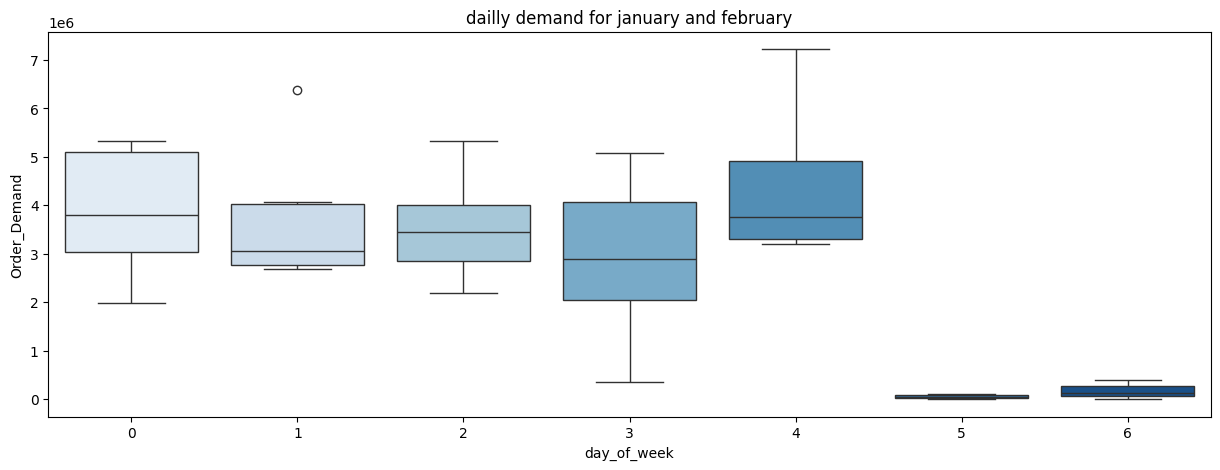

In [428]:
fig, ax = plt.subplots(figsize = (15,5))
sb.boxplot(data = demand_day.loc[(demand_day.index > '2016-01-01') & (demand_day.index < '2016-02-28')], x = 'day_of_week', y = 'Order_Demand', palette='Blues')
ax.set_title('dailly demand for january and february')
plt.show()


### Boxplot dailly Order demand for a year (2016)

C:\Users\mariah\AppData\Local\Temp\ipykernel_14572\3807120839.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(data = demand_day, x = 'day_of_week', y = 'Order_Demand', palette='Blues')


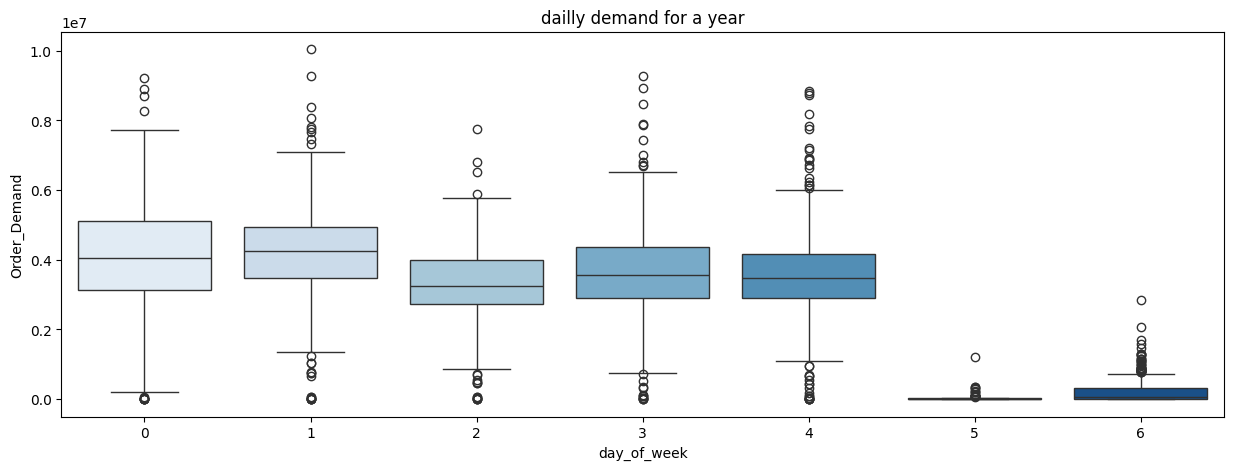

In [429]:
fig, ax = plt.subplots(figsize = (15,5))
sb.boxplot(data = demand_day, x = 'day_of_week', y = 'Order_Demand', palette='Blues')
ax.set_title('dailly demand for a year')
plt.show()


## Features selection

### select the most correlated variable with the Order demand

In [430]:
#Choose the most correlated features above 0.5 for training.
Order_Demand_most_corr = demand_day.corr()[(abs(demand_day.corr()['Order_Demand'])>=0.3)]

#Output a list of important feature names.
selected_variables = Order_Demand_most_corr.index

#select features
demand_day = demand_day[selected_variables]


### Separate features and target variables

In [431]:


train = demand_day.loc[(demand_day.index > '2012-01-01') & (demand_day.index < '2016-01-01')]
test = demand_day.loc[demand_day.index >= '2016-01-01']


X_train = np.array(train)
y_train = np.array(train['Order_Demand'])

X_test = np.array(test)
y_test = np.array(test['Order_Demand'])

### plot variables correlation

<Axes: >

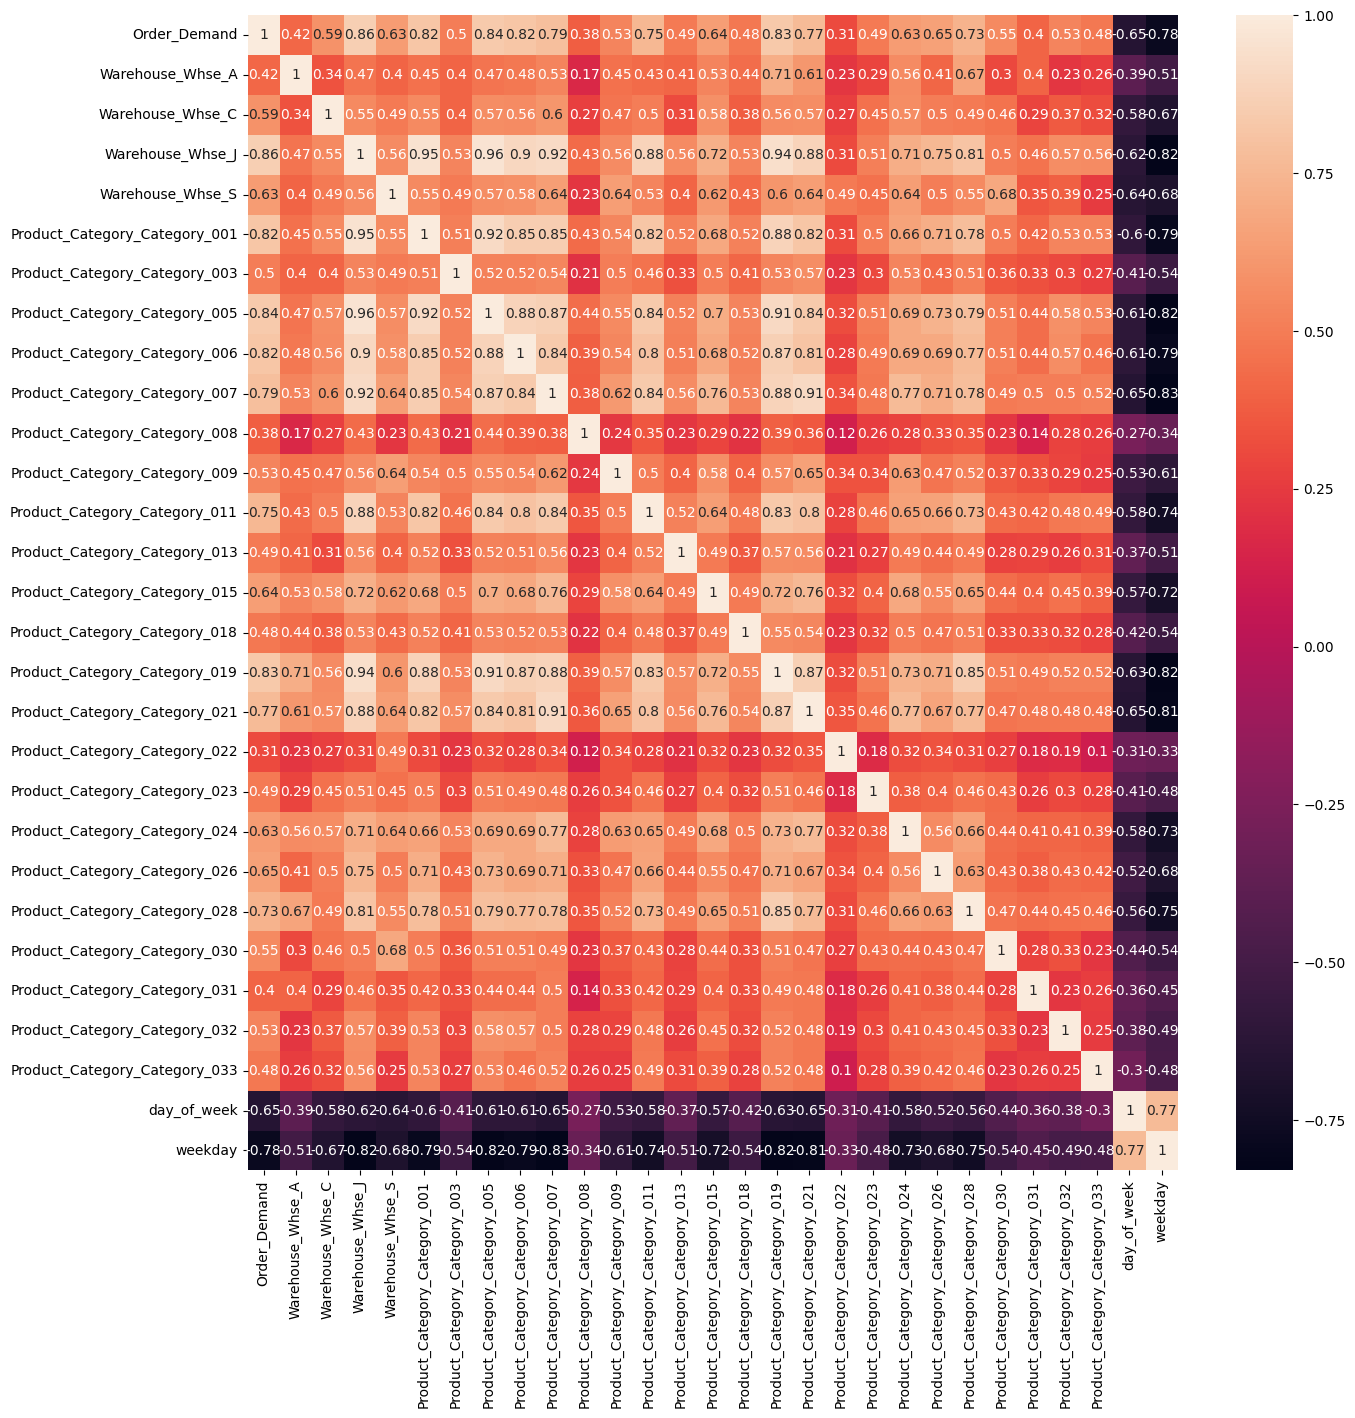

In [432]:
plt.figure(figsize=(15,15))
sb.heatmap(train.corr().round(2), annot=True)

### Train Decision tree model

e:\AI_ML_ROBOGARDEN\LABORATORY\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
5940 fits failed out of a total of 14580.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3082 fits failed with the following error:
Traceback (most recent call last):
  File "e:\AI_ML_ROBOGARDEN\LABORATORY\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\AI_ML_ROBOGARDEN\LABORATORY\.venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "e:\AI_ML_ROBOGARDEN\LABORATORY\.venv\Lib\site-packag

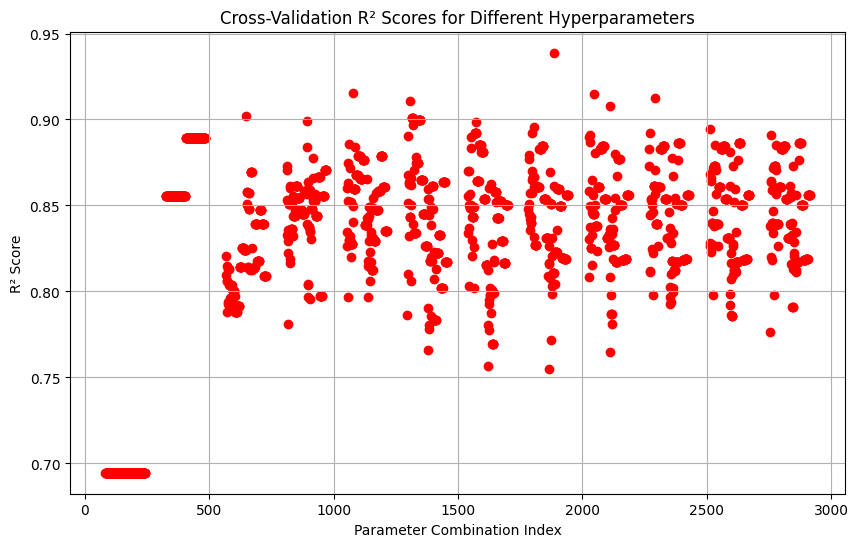

Best R² Score from Cross-Validation: 0.9388287110527717
Mean Squared Error on Test Set: 61241037045003.41%
R² Score on Test Set: 83.51%
Best parameters: {'max_depth': np.int64(15), 'max_features': 'log2', 'min_samples_leaf': np.int64(3), 'min_samples_split': np.int64(7)}


In [433]:
# Initialize the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=0)

# Define the hyperparameter grid for tuning
param_grid = {
    'max_depth': np.arange(1, 25, 2),  # Different tree depths to test
    'min_samples_split': np.arange(1, 10),   # Minimum samples required to split a node
    'min_samples_leaf': np.arange(1, 10),     # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Maximum features to consider at each split
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, 
                           scoring='r2', cv=5, n_jobs=-1, return_train_score=True)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the R² scores from the GridSearchCV results
results = grid_search.cv_results_

# Plot the R² scores for different parameter combinations
mean_test_scores = results['mean_test_score']
params = results['params']

# Create a DataFrame for easy visualization
cv_results_df = pd.DataFrame(params)
cv_results_df['mean_test_score'] = mean_test_scores

# Plot the R² scores for each combination of parameters
plt.figure(figsize=(10, 6))
plt.scatter(range(len(cv_results_df)), cv_results_df['mean_test_score'], color='red')
plt.title("Cross-Validation R² Scores for Different Hyperparameters")
plt.xlabel("Parameter Combination Index")
plt.ylabel("R² Score")
plt.grid(True)
plt.show()

# Display the best R² score
best_r2_score = grid_search.best_score_
print(f"Best R² Score from Cross-Validation: {best_r2_score}")

# Train the model with the best parameters
best_regressor = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_regressor.predict(X_test)

# Calculate Mean Squared Error and R² on the test set
mse = mean_squared_error(y_test, y_pred)
r2_test = best_regressor.score(X_test, y_test)

print(f"Mean Squared Error on Test Set: {mse*100:.2f}%")
print(f"R² Score on Test Set: {r2_test*100:.2f}%")
print(f"Best parameters: {grid_search.best_params_}")

### Train Random forest model

e:\AI_ML_ROBOGARDEN\LABORATORY\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1500 fits failed out of a total of 7500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1500 fits failed with the following error:
Traceback (most recent call last):
  File "e:\AI_ML_ROBOGARDEN\LABORATORY\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\AI_ML_ROBOGARDEN\LABORATORY\.venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "e:\AI_ML_ROBOGARDEN\LABORATORY\.venv\Lib\site-package

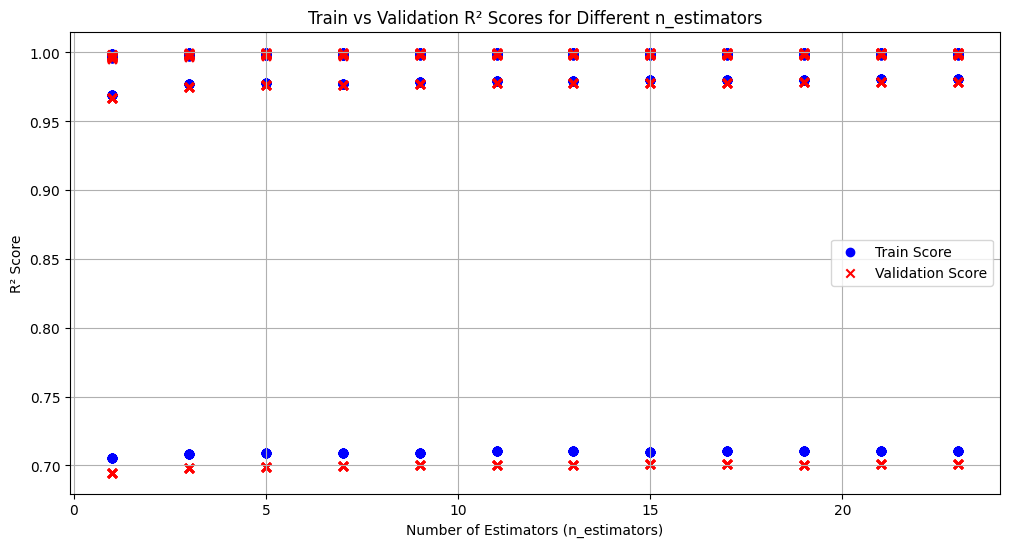

Mean Squared Error on Test Set: 38343456762.31%
R² Score on Test Set: 99.99%
Best parameters: {'max_depth': np.int64(7), 'min_samples_leaf': np.int64(1), 'min_samples_split': np.int64(3), 'n_estimators': np.int64(23)}


In [434]:


# Initialize the Random Forest Regressor
regressor = RandomForestRegressor(random_state=0)

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': np.arange(1, 25, 2),  # Number of trees
    'max_depth': np.arange(1, 11, 2),   # Maximum depth of the tree
    'min_samples_split': np.arange(1, 11, 2),  # Minimum samples required to split an internal node
    'min_samples_leaf': np.arange(1, 11, 2)     # Minimum samples required at each leaf node
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, 
                           scoring='r2', cv=5, n_jobs=-1, return_train_score=True)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Extract the results from the GridSearchCV object
results = grid_search.cv_results_

# Plot the R² scores for each combination of hyperparameters
plt.figure(figsize=(12, 6))

# Plot training scores
plt.scatter(results['param_n_estimators'], results['mean_train_score'], marker='o', label='Train Score', color='blue')

# Plot validation scores
plt.scatter(results['param_n_estimators'], results['mean_test_score'], marker='x', label='Validation Score', color='red')

plt.title("Train vs Validation R² Scores for Different n_estimators")
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("R² Score")
plt.legend()
plt.grid(True)
plt.show()

# Get the best model from GridSearchCV
best_regressor = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_regressor.predict(X_test)

# Calculate Mean Squared Error and R² on the test set
mse = mean_squared_error(y_test, y_pred)
r2_test = best_regressor.score(X_test, y_test)

print(f"Mean Squared Error on Test Set: {mse*100:.2f}%")
print(f"R² Score on Test Set: {r2_test*100:.2f}%")
print(f"Best parameters: {grid_search.best_params_}")

### Train Support Vector Machine model

{'C': 1000, 'epsilon': 0.5, 'kernel': 'poly'}


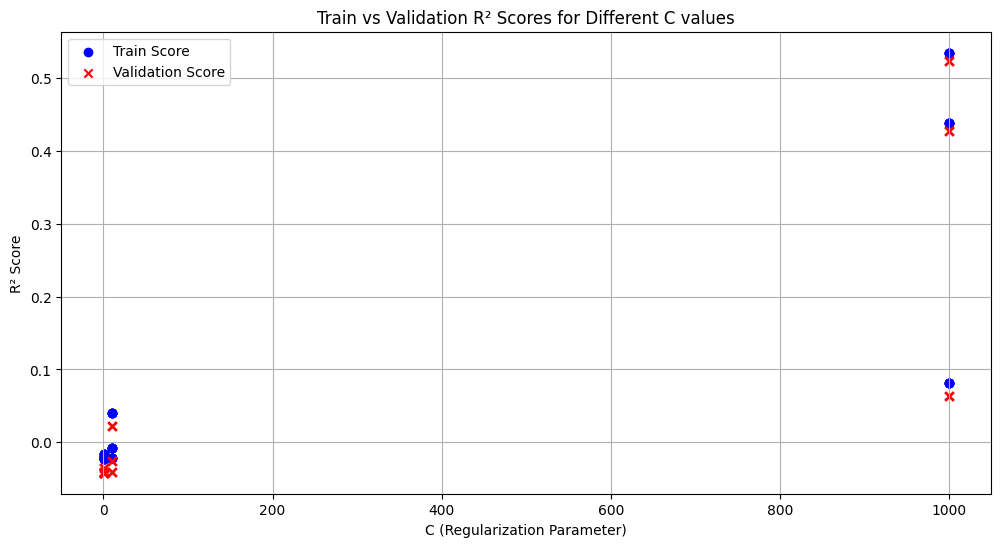

Mean Squared Error on Test Set: 210648005714557.38%
R² Score on Test Set: 43.29%
Best parameters: {'C': 1000, 'epsilon': 0.5, 'kernel': 'poly'}


In [ ]:
# We train our SVR only on 'day of week' and 'weekday' variables

X_train = np.array(train[['day_of_week', 'weekday']])
y_train = np.array(train['Order_Demand'])

X_test = np.array(test[['day_of_week', 'weekday']])
y_test = np.array(test['Order_Demand'])


# Initialize the SVR model
svr = SVR()

# Define the hyperparameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10, 1000],               # Regularization parameter
    'epsilon': [0.01, 0.1, 0.2, 0.3, 0.5],     # Epsilon parameter
    'kernel': ['linear', 'poly', 'rbf'],   # Different kernel types to test
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, 
                           scoring='r2', cv=5, n_jobs=-1, return_train_score=True)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

# Extract the results from the GridSearchCV object
results = grid_search.cv_results_

# Plot the R² scores for different combinations of C, epsilon, and kernel
plt.figure(figsize=(12, 6))

# Plot training scores
plt.scatter(results['param_C'], results['mean_train_score'], marker='o', label='Train Score', color='blue')

# Plot validation scores
plt.scatter(results['param_C'], results['mean_test_score'], marker='x', label='Validation Score', color='red')

plt.title("Train vs Validation R² Scores for Different C values")
plt.xlabel("C (Regularization Parameter)")
plt.ylabel("R² Score")
plt.legend()
plt.grid(True)
plt.show()

# Get the best model from GridSearchCV
best_svr = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_svr.predict(X_test)

# Calculate Mean Squared Error and R² on the test set
mse = mean_squared_error(y_test, y_pred)
r2_test = best_svr.score(X_test, y_test)

print(f"Mean Squared Error on Test Set: {mse*100:.2f}%")
print(f"R² Score on Test Set: {r2_test*100:.2f}%")
print(f"Best parameters: {grid_search.best_params_}")

<p> We can conclude that:</p>
<ul>
<li>Random forest model gives the best performace as 99.99% whith parameters : {'max_depth' : 7, 'min_samples_leaf' :  1, 'min_samples_split' :  3, 'n_estimators' :  23}</li>
<li>Decision tree gives us a performance of 83.51 with parameters {'max_depth' :  15, 'max_features' :  'log2', 'min_samples_leaf' :  3, 'min_samples_split' : 7}</li>
<li>SVR has the worst performance of 43.29</li>
</ul>